In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './results.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3))  # low dpi (dots per inch) yields small inline figures

scanpy==1.5.1 anndata==0.7.3 umap==0.4.5 numpy==1.18.5 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [3]:
adata = sc.read_loom("seurat_integrated.loom")

/home/timlai/anaconda3/envs/scanpy/lib/python3.6/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


In [6]:
'SCG5' in test

NameError: name 'test' is not defined

computing PCA
    with n_comps=50
    finished (0:00:17)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:19:35)


... storing 'ClusterName' as categorical
... storing 'Phase' as categorical
... storing 'integrated_snn_res_0_2' as categorical
... storing 'integrated_snn_res_0_3' as categorical
... storing 'integrated_snn_res_0_4' as categorical
... storing 'integrated_snn_res_0_5' as categorical
... storing 'integrated_snn_res_0_6' as categorical
... storing 'integrated_snn_res_0_7' as categorical
... storing 'integrated_snn_res_0_8' as categorical
... storing 'integrated_snn_res_0_9' as categorical
... storing 'integrated_snn_res_1' as categorical
... storing 'integrated_snn_res_1_1' as categorical
... storing 'integrated_snn_res_1_2' as categorical
... storing 'old_ident' as categorical
... storing 'orig_ident' as categorical
... storing 'seurat_clusters' as categorical


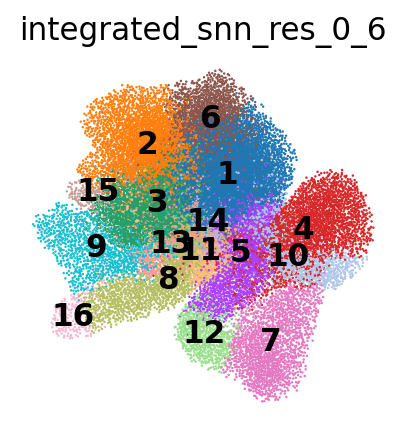

In [4]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs = 30)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color = 'integrated_snn_res_0_6', legend_loc = 'on data')

In [5]:
sc.tl.paga(adata, groups='integrated_snn_res_0_6')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)


--> added 'pos', the PAGA positions (adata.uns['paga'])


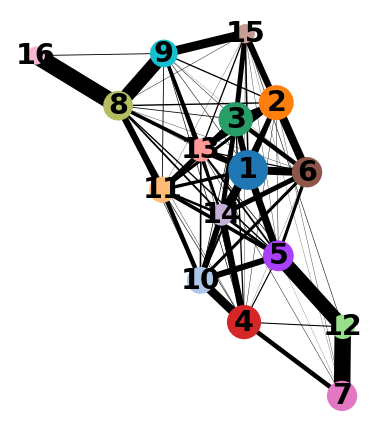

In [6]:
sc.pl.paga(adata)

--> added 'pos', the PAGA positions (adata.uns['paga'])


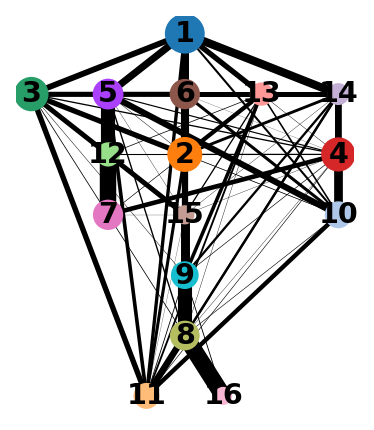

In [7]:
sc.pl.paga(adata, layout='rt')

--> added 'pos', the PAGA positions (adata.uns['paga'])


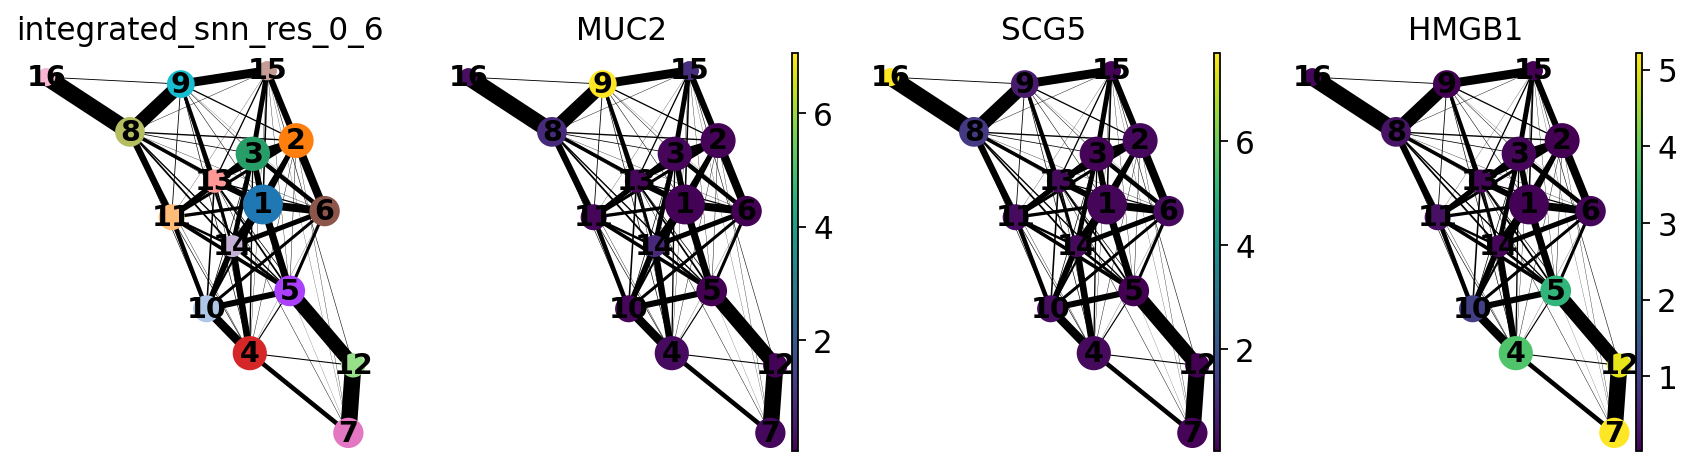

In [9]:
sc.pl.paga(adata, color = ['integrated_snn_res_0_6', 'MUC2', 'SCG5', 'HMGB1'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


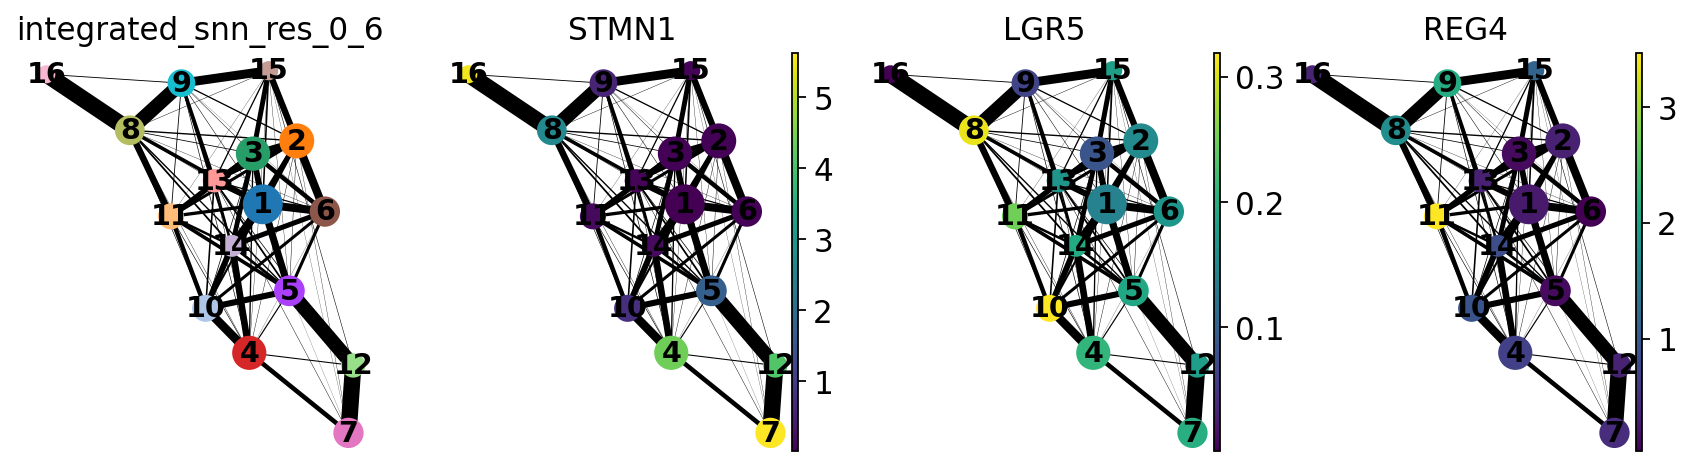

In [10]:
sc.pl.paga(adata, color = ['integrated_snn_res_0_6', 'STMN1', 'LGR5', 'REG4'])

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:19:10)


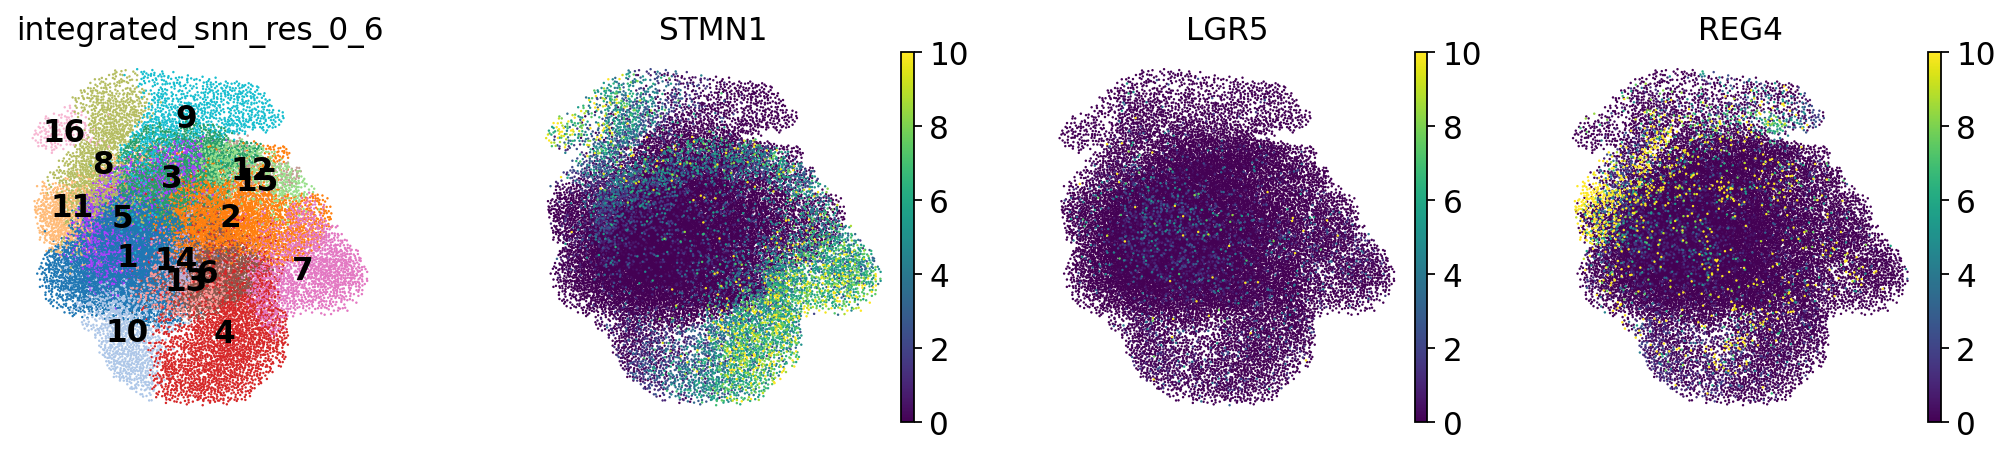

In [11]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['integrated_snn_res_0_6', 'STMN1', 'LGR5', 'REG4'], legend_loc='on data')

--> added 'pos', the PAGA positions (adata.uns['paga'])


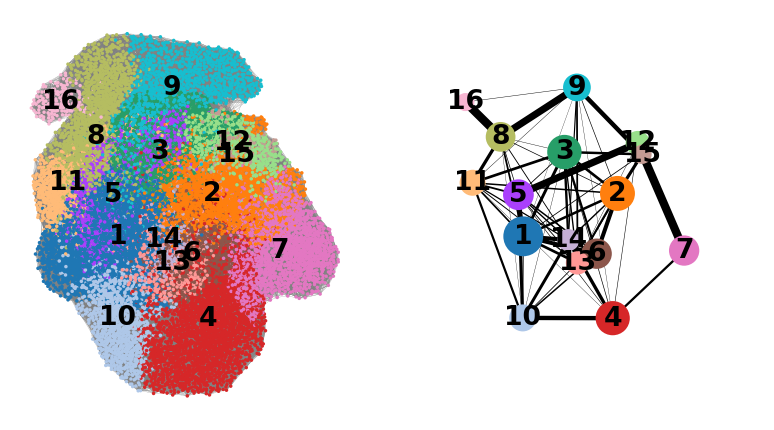

In [12]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [13]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)


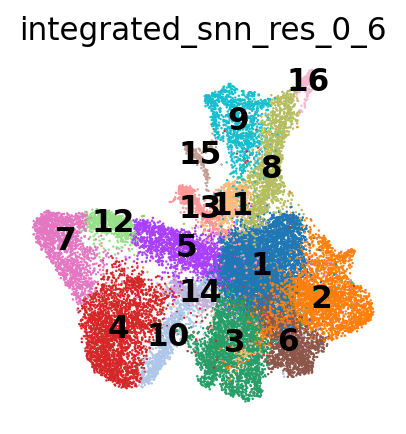

In [14]:
sc.pl.umap(adata, color=['integrated_snn_res_0_6'], legend_loc='on data')